Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# %matplotlib inline

In [8]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [9]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [43]:
directors_clean = data[data['director_name'] != '0']
top10_directors = directors_clean['director_name'].value_counts().head(10).index
top10_directors

Index(['Steven Spielberg', 'Woody Allen', 'Clint Eastwood', 'Martin Scorsese',
       'Ridley Scott', 'Tim Burton', 'Steven Soderbergh', 'Spike Lee',
       'Renny Harlin', 'Oliver Stone'],
      dtype='object', name='director_name')

In [45]:
top10_data = data[data['director_name'].isin(top10_directors)]

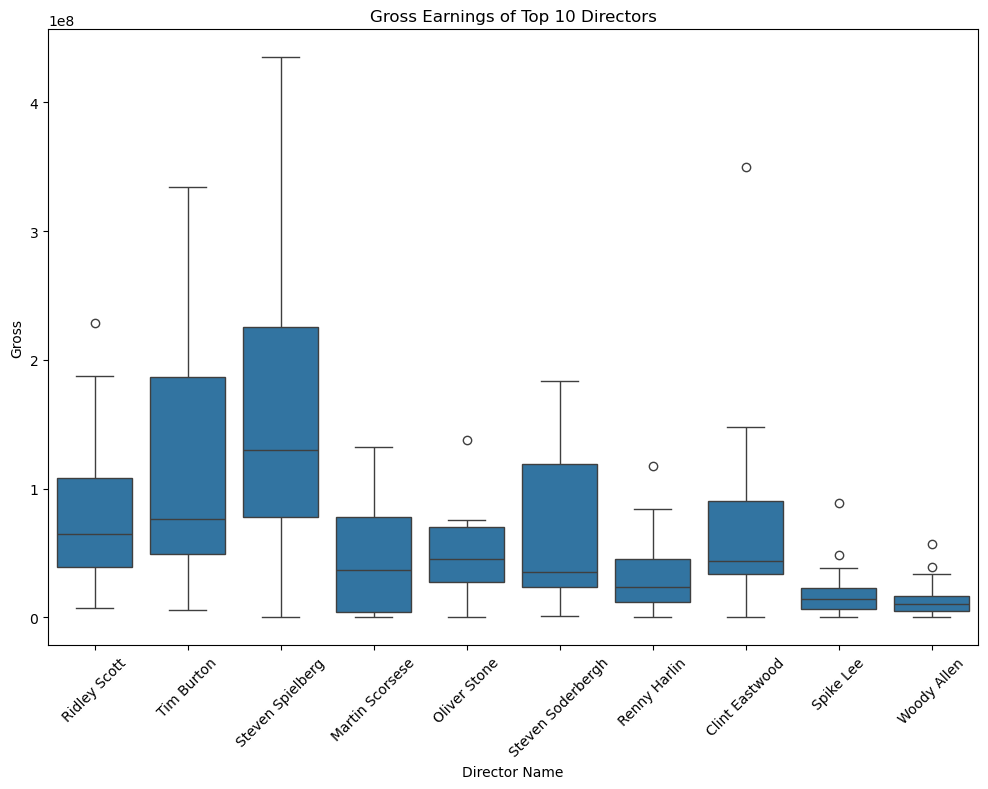

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='director_name', y='gross', data=top10_data)
plt.xticks(rotation=45)
plt.title('Gross Earnings of Top 10 Directors')
plt.xlabel('Director Name')
plt.ylabel('Gross')
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

In [49]:
graph = data[['num_critic_for_reviews', 'imdb_score', 'gross']]
graph

,num_critic_for_reviews,imdb_score,gross
0,723.0,7.9,760505847.0
1,302.0,7.1,309404152.0
2,602.0,6.8,200074175.0
3,813.0,8.5,448130642.0
4,0.0,7.1,0.0
...,...,...,...
5039,43.0,7.5,0.0
5040,13.0,6.3,0.0
5041,14.0,6.3,10443.0
5042,43.0,6.6,85222.0


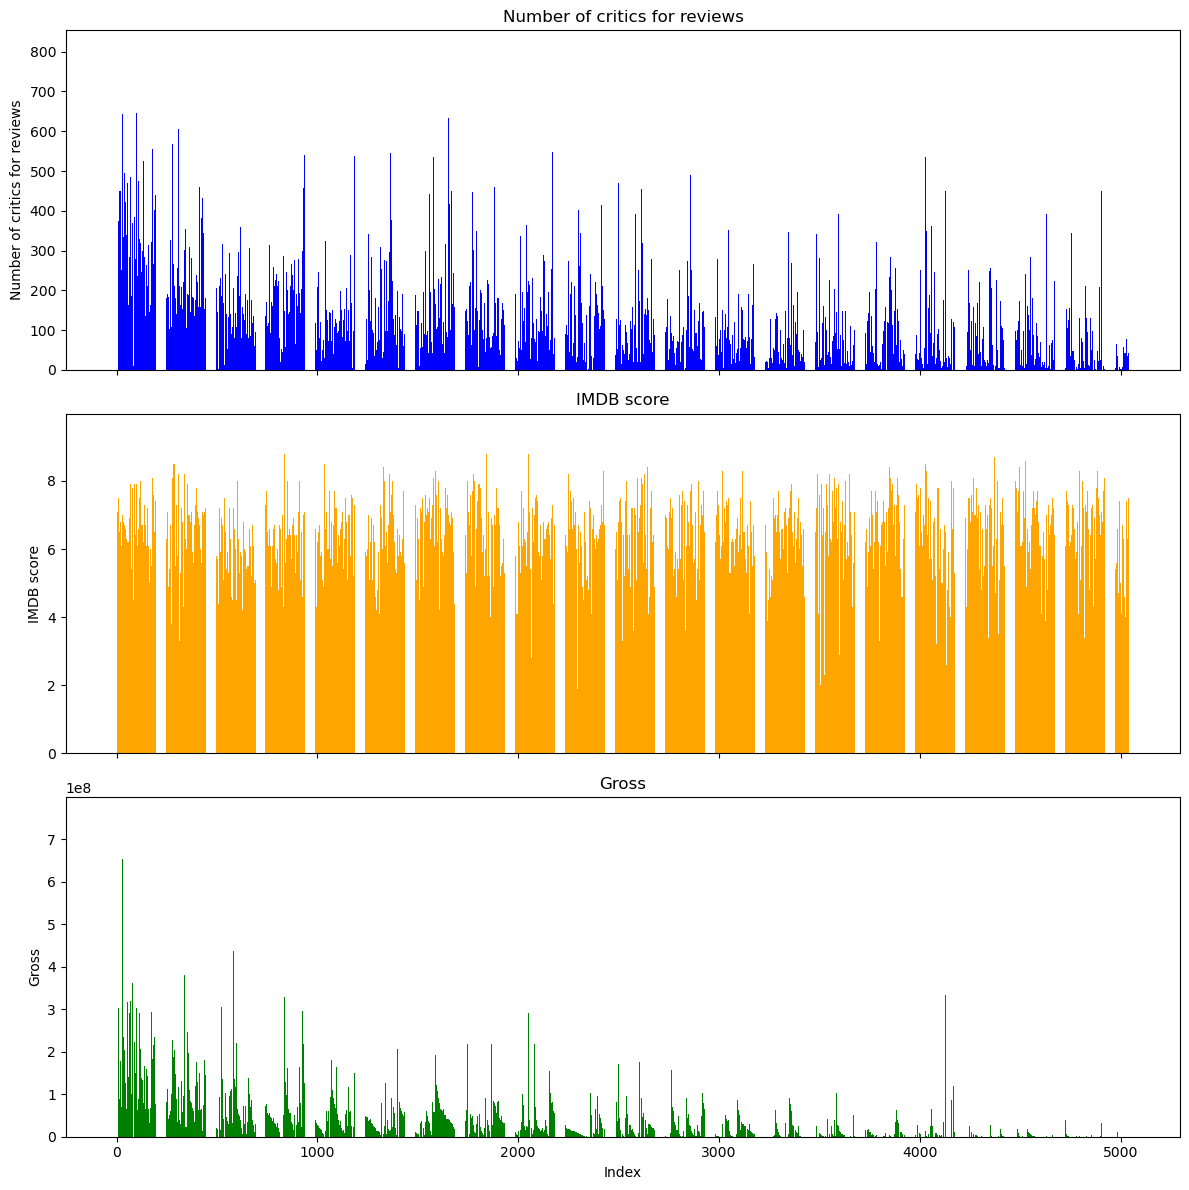

In [51]:
# Three separate bar graphs
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot for num_critic_for_reviews
axs[0].bar(graph.index, graph['num_critic_for_reviews'], color='blue')
axs[0].set_ylabel('Number of critics for reviews')
axs[0].set_title('Number of critics for reviews')

# Plot IMDB score
axs[1].bar(graph.index, graph['imdb_score'], color='orange')
axs[1].set_ylabel('IMDB score')
axs[1].set_title('IMDB score')

# Plot Gross
axs[2].bar(graph.index, graph['gross'], color='green')
axs[2].set_ylabel('Gross')
axs[2].set_title('Gross')

# Add a shared x-axis label
plt.xlabel('Index')
plt.tight_layout()  # Adjust layout to make room for labels and titles
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [52]:
directors_clean = data[data['director_name'] != '0'].copy()
directors_clean['sales'] = directors_clean['gross'] - directors_clean['budget']
directors_clean.head(3)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0


## Which directors garnered the most total sales?

In [53]:
sales_by_director = directors_clean.groupby('director_name')['sales'].sum()
top10_sales_directors = sales_by_director.sort_values(ascending=False).head(10)
top10_sales_directors

director_name
Steven Spielberg     2.451332e+09
George Lucas         1.386641e+09
James Cameron        1.199626e+09
Joss Whedon          1.000887e+09
Chris Columbus       9.417076e+08
Peter Jackson        9.009693e+08
Tim Burton           8.242755e+08
Christopher Nolan    8.082276e+08
Jon Favreau          7.693815e+08
Francis Lawrence     7.555020e+08
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

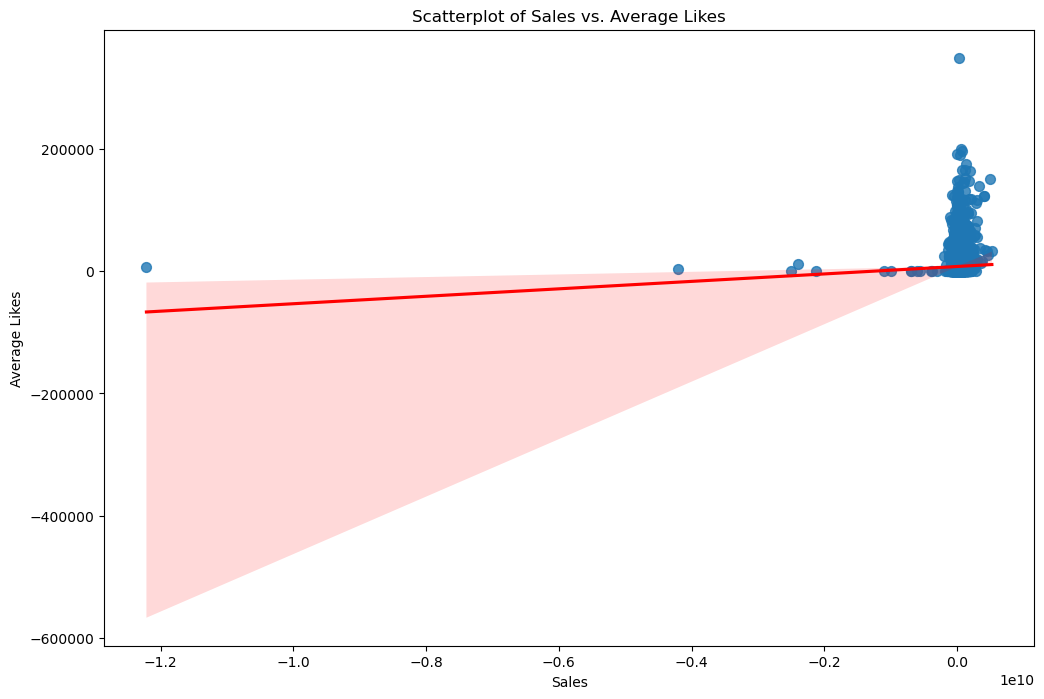

In [57]:
plt.figure(figsize=(12, 8))
sns.regplot(x='sales', y='movie_facebook_likes', data=directors_clean, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Sales')
plt.ylabel('Average Likes')
plt.title('Scatterplot of Sales vs. Average Likes')
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [71]:
data['sales'] = data['gross'] - data['budget']
sales_by_genre = data.groupby('genres')['sales'].sum()
top10_sales_genre = sales_by_genre.sort_values(ascending=False).head(10)
top10_sales_genre

genres
Comedy                                       3.410157e+09
Comedy|Romance                               2.529578e+09
Action|Adventure|Fantasy|Sci-Fi              2.394717e+09
Action|Adventure|Sci-Fi                      2.152709e+09
Comedy|Drama|Romance                         1.611889e+09
Adventure|Animation|Comedy|Family|Fantasy    1.398613e+09
Comedy|Drama                                 1.222683e+09
Drama|Romance                                1.183729e+09
Horror                                       1.147044e+09
Action|Adventure|Thriller                    1.140988e+09
Name: sales, dtype: float64

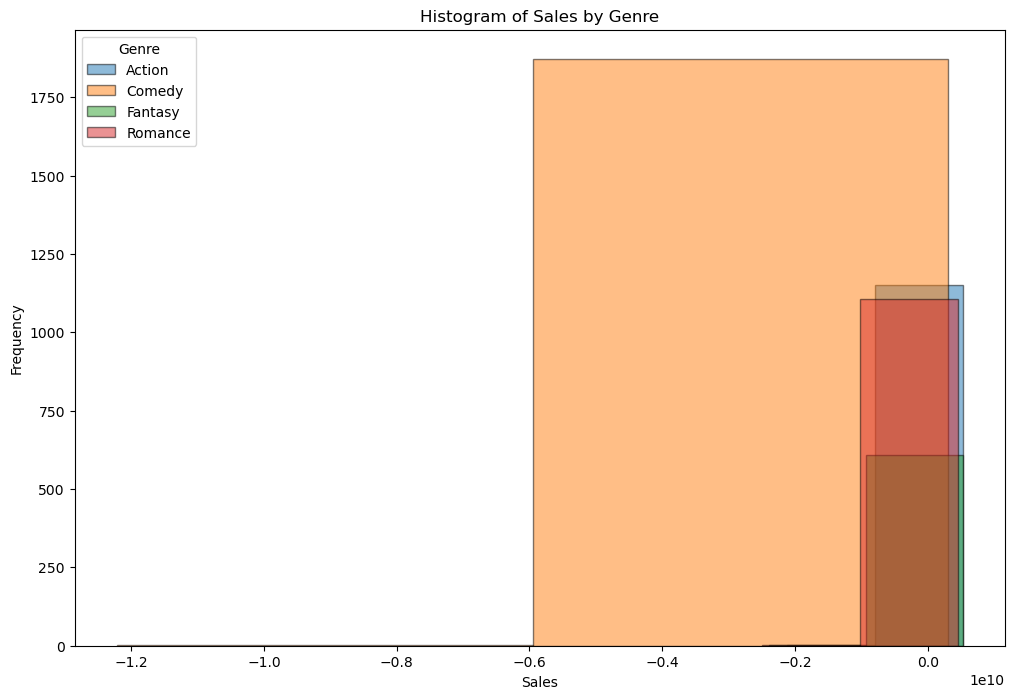

In [77]:
# Split genres of movies with multiple ones
exploded_genres = data.assign(genres=data['genres'].str.split('|')).explode('genres')

genres_list = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Filter data for the specified genres
filtered_data = exploded_genres[exploded_genres['genres'].isin(genres_list)]

# Extract sales data for each genre
sales_data = filtered_data.groupby('genres')['sales']

# Plot histograms for each genre
plt.figure(figsize=(12, 8))

# Iterate through each genre and plot histogram
for genre, sales in sales_data:
    plt.hist(sales, bins=2, alpha=0.5, label=genre, edgecolor='black')

plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales by Genre')
plt.legend(title='Genre')
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [85]:
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)
data.head(3)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333


## Copying the whole dataframe

In [91]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [93]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Make another copy of df data frame
df_normalized = df.copy()

In [95]:
for col in numeric_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df_normalized[col] = (df[col] - min_val) / (max_val - min_val)

df_normalized

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,b'The Following ',Color,0,0.052891,0.227513,0.000000,0.013870,Valorie Curry,0.001314,...,USA,TV-14,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002676
5040,0.999405,b'A Plague So Pleasant',Color,Benjamin Roberds,0.015990,0.402116,0.000000,0.000000,Maxwell Moody,0.000000,...,USA,0,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000
5041,0.999603,b'Shanghai Calling',Color,Daniel Hsia,0.017220,0.529101,0.000000,0.021261,Daniel Henney,0.001478,...,USA,PG-13,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003289
5042,0.999802,b'My Date with Drew',Color,Jon Gunn,0.052891,0.476190,0.000696,0.000696,Brian Herzlinger,0.000134,...,USA,PG,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000191
